# 05_Plot_Niche_Performance.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
import os
import scanpy as sc
import pandas as pd
import numpy as np

# approximate original figure in http://spatial.libd.org/spatialLIBD/
palette_celltype={'L1':'#eb34a8',
                  'L2':'#3486eb',
                  'L3':'#34eb5b',
                  'L4':"#ae34eb",
                  'L5':'#ebdb34',
                  'L6':'#eb9234',
                  'WM':'#000000'}

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"

import simba as si
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
import matplotlib.pyplot as plt
from benchmarking.plot import generate_umap_figures, generate_pca_figures, combine_images, generate_spatial_kernel_figures

Did this update
```bash
../../SHARED_SOFTWARE/anaconda_latest/bin/mamba install -c conda-forge ipywidgets
../../../SHARED_SOFTWARE/anaconda_latest/bin/mamba install "numpy=1.26.4" "scipy" "openblas" -c conda-forge
```

In [3]:
from benchmarking.niche import run_niche_comparison

# PCA

In [ ]:
pca_performance_fn, pca_figures_fn = run_niche_comparison(
    results_tsv_path="../results/00/pca_rna/run_pca.output.tsv", 
    cell_embedding_adata_fn="adata_CG.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_pca', # column name with path to sample results
    version='PCA'
)

In [14]:
pca_performance_fn

'../results/00/pca_rna/run_pca.output.performance.niche.tsv'

# SpatialPCA

In [18]:
spatialpca_performance_fn, spatialpca_figures_fn = run_niche_comparison(
    results_tsv_path="../results/00/spatialpca/spatialpca_adata_py.tsv", 
    cell_embedding_adata_fn="spatialPCA_to_py.adata.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='spatialPCA_dir',
    parse_path_col='spatialPCA_adata_fn',
    version='PCA'
)

                                      spatialPCA_adata_fn  \
151507  ../results/00/spatialpca/151507/spatialPCA_to_...   
151508  ../results/00/spatialpca/151508/spatialPCA_to_...   
151509  ../results/00/spatialpca/151509/spatialPCA_to_...   
151510  ../results/00/spatialpca/151510/spatialPCA_to_...   
151669  ../results/00/spatialpca/151669/spatialPCA_to_...   

                         spatialPCA_dir  
151507  ../results/00/spatialpca/151507  
151508  ../results/00/spatialpca/151508  
151509  ../results/00/spatialpca/151509  
151510  ../results/00/spatialpca/151510  
151669  ../results/00/spatialpca/151669  


  0%|          | 0/12 [00:00<?, ?it/s]

setting PCA for X in new adata object


  8%|▊         | 1/12 [00:13<02:32, 13.85s/it]

setting PCA for X in new adata object


 17%|█▋        | 2/12 [00:29<02:29, 14.91s/it]

setting PCA for X in new adata object


 25%|██▌       | 3/12 [00:46<02:22, 15.89s/it]

setting PCA for X in new adata object


 33%|███▎      | 4/12 [01:02<02:07, 15.99s/it]

setting PCA for X in new adata object


 42%|████▏     | 5/12 [01:14<01:42, 14.62s/it]

setting PCA for X in new adata object


 50%|█████     | 6/12 [01:25<01:19, 13.26s/it]

setting PCA for X in new adata object


 58%|█████▊    | 7/12 [01:39<01:06, 13.38s/it]

setting PCA for X in new adata object


 67%|██████▋   | 8/12 [01:51<00:52, 13.03s/it]

setting PCA for X in new adata object


 75%|███████▌  | 9/12 [02:02<00:37, 12.45s/it]

setting PCA for X in new adata object


 83%|████████▎ | 10/12 [02:15<00:24, 12.47s/it]

setting PCA for X in new adata object


 92%|█████████▏| 11/12 [02:25<00:11, 11.97s/it]

setting PCA for X in new adata object


100%|██████████| 12/12 [02:36<00:00, 13.05s/it]


In [19]:
spatialpca_performance_fn

'../results/00/spatialpca/spatialpca_adata_py.performance.niche.tsv'

# SIMBA RNA only

In [20]:
sr_performance_fn, sr_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_rna_only/run_simba_rna_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_rna_only', # column name with path to sample results
)
sr_performance_fn

100%|██████████| 12/12 [01:59<00:00,  9.98s/it]


'../results/00/simba_rna_only/run_simba_rna_only.output.performance.niche.tsv'

# SIMBA spatial only

## Mask

In [21]:
ss_mask_performance_fn, ss_mask_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_only/mask_r500/run_simba_spatial_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_only', # column name with path to sample results
)

100%|██████████| 12/12 [01:59<00:00,  9.92s/it]


In [24]:
ss_mask_performance_fn

'../results/00/simba_spatial_only/mask_r500/run_simba_spatial_only.output.performance.niche.tsv'

## Gaussian

In [22]:
ss_gaussian_performance_fn, ss_gaussian_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_only/gaussian_e3/run_simba_spatial_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_only', # column name with path to sample results
)

100%|██████████| 12/12 [01:58<00:00,  9.87s/it]


In [25]:
ss_gaussian_performance_fn

'../results/00/simba_spatial_only/gaussian_e3/run_simba_spatial_only.output.performance.niche.tsv'

## RBF

In [23]:
ss_rbf_performance_fn, ss_rbf_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_only/rbf_e5/run_simba_spatial_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_only', # column name with path to sample results
)

100%|██████████| 12/12 [01:58<00:00,  9.91s/it]


In [26]:
ss_rbf_performance_fn

'../results/00/simba_spatial_only/rbf_e5/run_simba_spatial_only.output.performance.niche.tsv'

# SIMBA spatial and RNA

## Mask + RNA (no correlation)

In [27]:
ssr_mask_performance_fn, ssr_mask_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna/mask_r500_sF_w1.0/run_simba_spatial_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_only', # column name with path to sample results
)

100%|██████████| 12/12 [01:58<00:00,  9.84s/it]


In [28]:
ssr_mask_performance_fn

'../results/00/simba_spatial_and_rna/mask_r500_sF_w1.0/run_simba_spatial_only.output.performance.niche.tsv'

## Mask + RNA with correlation

In [30]:
ssr_mask_corr_performance_fn, ssr_mask_corr_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna/mask_r500_sT_w1.0/run_simba_spatial_and_rna.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna', # column name with path to sample results
)

100%|██████████| 12/12 [01:58<00:00,  9.89s/it]


In [52]:
ssr_mask_corr_performance_fn

'../results/00/simba_spatial_and_rna/mask_r500_sT_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

## Gaussian + RNA (no correlation)

In [31]:
ssr_gaussian_performance_fn, ssr_gaussian_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna/gaussian_e3_sF_w1.0/run_simba_spatial_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_only', # column name with path to sample results
)

100%|██████████| 12/12 [02:06<00:00, 10.58s/it]


In [32]:
ssr_gaussian_performance_fn

'../results/00/simba_spatial_and_rna/gaussian_e3_sF_w1.0/run_simba_spatial_only.output.performance.niche.tsv'

## Gaussian + RNA with correlation

In [33]:
ssr_gaussian_corr_performance_fn, ssr_gaussian_corr_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna/gaussian_e3_sT_w1.0/run_simba_spatial_and_rna.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna', # column name with path to sample results
)

100%|██████████| 12/12 [02:02<00:00, 10.21s/it]


In [34]:
ssr_gaussian_corr_performance_fn

'../results/00/simba_spatial_and_rna/gaussian_e3_sT_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

## RBF + RNA (no correlation)

In [35]:
ssr_rbf_performance_fn, ssr_rbf_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna/rbf_e5_sF_w1.0/run_simba_spatial_only.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_only', # column name with path to sample results
)

100%|██████████| 12/12 [02:02<00:00, 10.18s/it]


In [36]:
ssr_rbf_performance_fn

'../results/00/simba_spatial_and_rna/rbf_e5_sF_w1.0/run_simba_spatial_only.output.performance.niche.tsv'

## RBF + RNA with correlation

In [37]:
ssr_rbf_corr_performance_fn, ssr_rbf_corr_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna/rbf_e5_sT_w1.0/run_simba_spatial_and_rna.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna', # column name with path to sample results
)

100%|██████████| 12/12 [02:01<00:00, 10.14s/it]


In [38]:
ssr_rbf_corr_performance_fn

'../results/00/simba_spatial_and_rna/rbf_e5_sT_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

# SIMBA regions

## Regions high weight

In [48]:
rs_high_performance_fn, rs_high_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna_region_entities/regions_g500.0_w1.0/run_simba_spatial_and_rna.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna', # column name with path to sample results
)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [03:40<00:00, 18.40s/it]


In [49]:
rs_high_performance_fn

'../results/00/simba_spatial_and_rna_region_entities/regions_g500.0_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

## Regions low weight

In [50]:
rs_low_performance_fn, rs_low_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna_region_entities/regions_g500.0_w0.5/run_simba_spatial_and_rna.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna', # column name with path to sample results
)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [03:06<00:00, 15.53s/it]


In [51]:
rs_low_performance_fn

'../results/00/simba_spatial_and_rna_region_entities/regions_g500.0_w0.5/run_simba_spatial_and_rna.output.performance.niche.tsv'

# SIMBA + BANKSY

## Local

In [6]:
sb_local_performance_fn, sb_local_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_BANKSY/mask_e500_l0.8_b10/run_simba_spatial_and_rna_BANKSY.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna_BANKSY', # column name with path to sample results
)

100%|██████████| 12/12 [01:48<00:00,  9.02s/it]


In [53]:
sb_local_performance_fn

'../results/00/simba_spatial_and_BANKSY/mask_e500_l0.8_b10/run_simba_spatial_and_rna_BANKSY.output.performance.niche.tsv'

## Global

In [7]:
sb_global_performance_fn, sb_global_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_BANKSY/mask_e500_l0.2_b10/run_simba_spatial_and_rna_BANKSY.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna_BANKSY', # column name with path to sample results
    parse_path_col=None
)

 25%|██▌       | 3/12 [00:34<01:47, 11.98s/it]

100%|██████████| 12/12 [01:58<00:00,  9.86s/it]


In [43]:
sb_global_performance_fn

'../results/00/simba_spatial_and_BANKSY/mask_e500_l0.2_b10/run_simba_spatial_and_rna_BANKSY.output.performance.niche.tsv'

# Rank K

## Local

In [44]:
srk_local_performance_fn, srk_local_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna_rankK/k6_l0.8_b20/run_simba_spatial_and_rna_rankK.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna_rankK', # column name with path to sample results
)

100%|██████████| 12/12 [03:15<00:00, 16.31s/it]


In [45]:
srk_local_performance_fn

'../results/00/simba_spatial_and_rna_rankK/k6_l0.8_b20/run_simba_spatial_and_rna_rankK.output.performance.niche.tsv'

## Global

In [46]:
srk_global_performance_fn, srk_global_figures_fn = run_niche_comparison(
    results_tsv_path='../results/00/simba_spatial_and_rna_rankK/k6_l0.2_b20/run_simba_spatial_and_rna_rankK.output.tsv', 
    cell_embedding_adata_fn="adata_C.h5ad",
    adata_spatial_dir="/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/",
    col_name='run_simba_spatial_and_rna_rankK', # column name with path to sample results
)

100%|██████████| 12/12 [02:14<00:00, 11.20s/it]


In [47]:
srk_global_performance_fn

'../results/00/simba_spatial_and_rna_rankK/k6_l0.2_b20/run_simba_spatial_and_rna_rankK.output.performance.niche.tsv'

# Aggregate

In [54]:
pca_performance_fn = '../results/00/pca_rna/run_pca.output.performance.niche.tsv'
spatialpca_performance_fn = '../results/00/spatialpca/spatialpca_adata_py.performance.niche.tsv'
sr_performance_fn = '../results/00/simba_rna_only/run_simba_rna_only.output.performance.niche.tsv'

ss_mask_performance_fn = '../results/00/simba_spatial_only/mask_r500/run_simba_spatial_only.output.performance.niche.tsv'
ss_gaussian_performance_fn = '../results/00/simba_spatial_only/gaussian_e3/run_simba_spatial_only.output.performance.niche.tsv'
ss_rbf_performance_fn = '../results/00/simba_spatial_only/rbf_e5/run_simba_spatial_only.output.performance.niche.tsv'

ssr_mask_performance_fn = '../results/00/simba_spatial_and_rna/mask_r500_sF_w1.0/run_simba_spatial_only.output.performance.niche.tsv'
ssr_mask_corr_performance_fn = '../results/00/simba_spatial_and_rna/mask_r500_sT_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

ssr_gaussian_performance_fn = '../results/00/simba_spatial_and_rna/gaussian_e3_sF_w1.0/run_simba_spatial_only.output.performance.niche.tsv'
ssr_gaussian_corr_performance_fn = '../results/00/simba_spatial_and_rna/gaussian_e3_sT_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

ssr_rbf_performance_fn = '../results/00/simba_spatial_and_rna/rbf_e5_sF_w1.0/run_simba_spatial_only.output.performance.niche.tsv'
ssr_rbf_corr_performance_fn = '../results/00/simba_spatial_and_rna/rbf_e5_sT_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'

rs_high_performance_fn = '../results/00/simba_spatial_and_rna_region_entities/regions_g500.0_w1.0/run_simba_spatial_and_rna.output.performance.niche.tsv'
rs_low_performance_fn = '../results/00/simba_spatial_and_rna_region_entities/regions_g500.0_w0.5/run_simba_spatial_and_rna.output.performance.niche.tsv'

sb_local_performance_fn = '../results/00/simba_spatial_and_BANKSY/mask_e500_l0.8_b10/run_simba_spatial_and_rna_BANKSY.output.performance.niche.tsv'
sb_global_performance_fn = '../results/00/simba_spatial_and_BANKSY/mask_e500_l0.2_b10/run_simba_spatial_and_rna_BANKSY.output.performance.niche.tsv'

srk_local_performance_fn = '../results/00/simba_spatial_and_rna_rankK/k6_l0.8_b20/run_simba_spatial_and_rna_rankK.output.performance.niche.tsv'
srk_global_performance_fn = '../results/00/simba_spatial_and_rna_rankK/k6_l0.2_b20/run_simba_spatial_and_rna_rankK.output.performance.niche.tsv'

In [56]:
pca_performance_df = pd.read_csv(pca_performance_fn, sep='\t', index_col=0)
spatialpca_performance_df = pd.read_csv(spatialpca_performance_fn, sep='\t', index_col=0)
sr_performance_df = pd.read_csv(sr_performance_fn, sep='\t', index_col=0)

ss_mask_performance_df = pd.read_csv(ss_mask_performance_fn, sep='\t', index_col=0)
ss_gaussian_performance_df = pd.read_csv(ss_gaussian_performance_fn, sep='\t', index_col=0)
ss_rbf_performance_df = pd.read_csv(ss_rbf_performance_fn, sep='\t', index_col=0)

ssr_mask_performance_df = pd.read_csv(ssr_mask_performance_fn, sep='\t', index_col=0)
ssr_mask_corr_performance_df = pd.read_csv(ssr_mask_corr_performance_fn, sep='\t', index_col=0)

ssr_gaussian_performance_df = pd.read_csv(ssr_gaussian_performance_fn, sep='\t', index_col=0)
ssr_gaussian_corr_performance_df = pd.read_csv(ssr_gaussian_corr_performance_fn, sep='\t', index_col=0)

ssr_rbf_performance_df = pd.read_csv(ssr_rbf_performance_fn, sep='\t', index_col=0)
ssr_rbf_corr_performance_df = pd.read_csv(ssr_rbf_corr_performance_fn, sep='\t', index_col=0)

rs_high_performance_df = pd.read_csv(rs_high_performance_fn, sep='\t', index_col=0)
rs_low_performance_df = pd.read_csv(rs_low_performance_fn, sep='\t', index_col=0)

sb_local_performance_df = pd.read_csv(sb_local_performance_fn, sep='\t', index_col=0)
sb_global_performance_df = pd.read_csv(sb_global_performance_fn, sep='\t', index_col=0)

srk_local_performance_df = pd.read_csv(srk_local_performance_fn, sep='\t', index_col=0)
srk_global_performance_df = pd.read_csv(srk_global_performance_fn, sep='\t', index_col=0)

In [58]:
pca_performance_df['method'] = 'PCA'
pca_performance_df['submethod'] = 'PCA'
spatialpca_performance_df['method'] = 'SpatialPCA'
spatialpca_performance_df['submethod'] = 'SpatialPCA'

sr_performance_df['method'] = 'SIMBA'
sr_performance_df['submethod'] = 'RNA'

ssr_mask_performance_df['method'] = 'SIMBA'
ssr_mask_performance_df['submethod'] = 'RNA + Spatial Mask'

ssr_mask_corr_performance_df['method'] = 'SIMBA'
ssr_mask_corr_performance_df['submethod'] = 'RNA + Weighted Spatial Mask'

ssr_gaussian_performance_df['method'] = 'SIMBA'
ssr_gaussian_performance_df['submethod'] = 'RNA + Spatial Gaussian'

ssr_gaussian_corr_performance_df['method'] = 'SIMBA'
ssr_gaussian_corr_performance_df['submethod'] = 'RNA + Weighted Spatial Gaussian'

ssr_rbf_performance_df['method'] = 'SIMBA'
ssr_rbf_performance_df['submethod'] = 'RNA + Spatial RBF'

ssr_rbf_corr_performance_df['method'] = 'SIMBA'
ssr_rbf_corr_performance_df['submethod'] = 'RNA + Weighted Spatial RBF'

rs_low_performance_df['method'] = 'SIMBA'
rs_low_performance_df['submethod'] = 'RNA + Region Entity (0.5)'

rs_high_performance_df['method'] = 'SIMBA'
rs_high_performance_df['submethod'] = 'RNA + Region Entity (1.0)'

sb_local_performance_df['method'] = 'SIMBA'
sb_local_performance_df['submethod'] = 'BANKSY - local'

sb_global_performance_df['method'] = 'SIMBA'
sb_global_performance_df['submethod'] = 'BANKSY - global'

srk_local_performance_df['method'] = 'SIMBA'
srk_local_performance_df['submethod'] = 'Rank k=6 local'

srk_global_performance_df['method'] = 'SIMBA'
srk_global_performance_df['submethod'] = 'Rank k=6 global'


In [59]:
performance_df = pd.concat([
    pca_performance_df,
    spatialpca_performance_df,
    sr_performance_df,
    ssr_mask_performance_df,
    ssr_gaussian_performance_df,  
    ssr_rbf_performance_df,
    ssr_mask_corr_performance_df,
    ssr_gaussian_corr_performance_df,
    ssr_rbf_corr_performance_df,
    rs_low_performance_df,
    rs_high_performance_df, # TODO: meta cells
    sb_local_performance_df,
    sb_global_performance_df,
    srk_local_performance_df,
    srk_global_performance_df,
])

In [61]:
performance_df.head()

,spearman_corr,pearson_corr,trust,method,submethod
151675,0.386285,0.390504,0.775190,PCA,PCA
151507,0.340297,0.343685,0.747407,PCA,PCA
151510,0.399694,0.399265,0.737788,PCA,PCA
151674,0.425882,0.432331,0.794705,PCA,PCA
151669,0.303458,0.279636,0.657887,PCA,PCA


In [60]:
import seaborn as sns

/tmp/ipykernel_2792333/1267026651.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1))
/tmp/ipykernel_2792333/1267026651.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1))
/tmp/ipykernel_2792333/1267026651.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1))


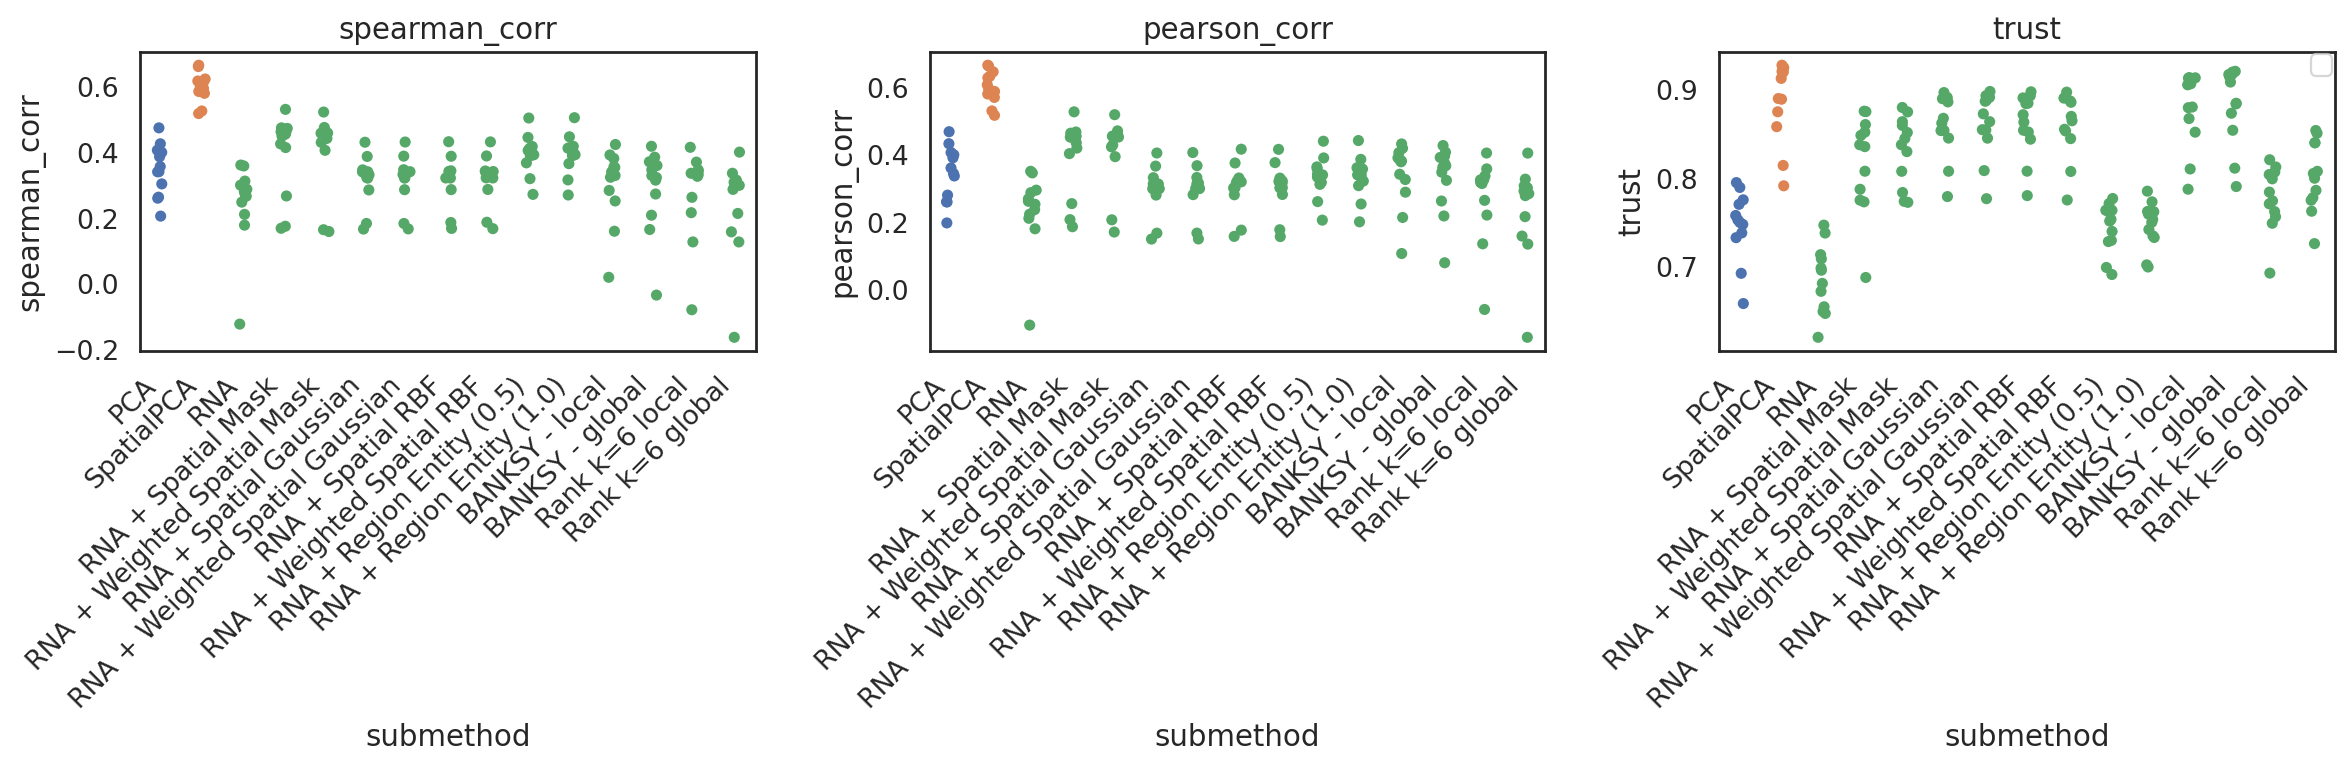

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

for i, measure in enumerate(['spearman_corr', 'pearson_corr', 'trust']):
    sns.stripplot(performance_df.reset_index(), x='submethod', hue='method', y=measure, ax=axes[i], legend=False)
    axes[i].set_title(measure)
    if measure in ['ARI', 'NMI']:
        axes[i].set_ylim(0, 1)
    if measure == 'silhoutte':
        axes[i].axhline(0, c='r', linestyle='--')

    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment('right')

    plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
